# Here is my implemenatation of K-Means.

In [0]:
import numpy as np
import pandas as pd
import math
import random
from collections import defaultdict
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
class K_Means(object):

  def __init__(self, dataset, k, max_iterations = 30, tolerance = 0.0001, num_init = 1):
        self.df = dataset
        self.k = k
        self.num_obs, self.num_features = self.df.shape
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.num_init = num_init
        self.inertia_values = []
        self.data_all_iterations = []  # all centroids and clustered dataset points
        self.final_clusters = {}
        self.final_centroids = []

  @staticmethod
  def get_euclidean_distance(ndim_point1, ndim_point2):
    """
    Static method to calculate the normalized Euclidean distance between any n-dimensional numpy arrays
      :param ndim_point1: an n-dimensional numpy array (aka a point in space)
      :param ndim_point2: an n-dimensional numpy array (aka a point in space)
      :return: the Euclidean distance between two n-dimensional numpy arrays
    """
    return np.linalg.norm(ndim_point1 - ndim_point2)

  def initialize_random(self):
    random_indices = random.sample(range(0, self.num_obs), self.k)
    random_centroids = self.df[random_indices]
    
    return random_centroids

  def fit(self):
    for initialization in range(self.num_init):
      self.__clustering(initialization)

      # taking the last cluster assignment of the iteration
      inertia_final = self.inertia(self.data_all_iterations[initialization][-1])
      self.inertia_values.append(inertia_final)

    # save the final cluster configuration
    self.__set_final_clusters()

    return None

  def inertia(self, clusters):
    sum_of_squares = 0

    for centroid, cluster_points in clusters.items():
      for point in cluster_points:
        distance = self.get_euclidean_distance(point, centroid)
        distance_squared = distance ** 2
        
        sum_of_squares += distance_squared

    return sum_of_squares

  def predict(self, new_point):
    distances = [self.get_euclidean_distance(centroid, new_point) for centroid in self.final_centroids]
    closest_centroid = distances.index(min(distances))

    return closest_centroid

  def __assign_to_centroids(self, centroids):
    iteration_data = defaultdict(list)

    for point in self.df:
      point_centroid_distances = []
      
      for centroid in centroids:
        distance = self.get_euclidean_distance(centroid, point)
        point_centroid_distances.append(distance)

      closest_centroid_index = np.argmin(point_centroid_distances)
      closest_centroid = tuple(centroids[closest_centroid_index])
      iteration_data[closest_centroid].append(point)
        
    return iteration_data

  def __clustering(self, init_num):
    self.data_all_iterations.append([])
    centroids = self.initialize_random()

    for iteration in range(1, self.max_iterations + 1):
      iteration_data = self.__assign_to_centroids(centroids)
      self.data_all_iterations[init_num].append(iteration_data)

      updated_centroids = []

      for centroid in iteration_data:
        cluster_points = iteration_data[centroid]
        updated_centroid = np.mean(cluster_points, axis=0)
        updated_centroids.append(updated_centroid)

      if self.get_euclidean_distance(np.array(updated_centroids), centroids) < self.tolerance:
          break

      centroids = updated_centroids

    return None

  def __minimal_inertia_cluster(self):
    min_inertia = min(self.inertia_values)
    min_inertia_index = self.inertia_values.index(min_inertia)

    return min_inertia_index

  def __set_final_clusters(self):
    self.final_clusters = self.data_all_iterations[self.__minimal_inertia_cluster()][-1]
    self.final_centroids = list(self.final_clusters.keys())

# Testing the implementation.

In [0]:
X, y = datasets.make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)

In [0]:
kmeans = K_Means(dataset = X, k = 4,  max_iterations = 100, tolerance = 0.0001, num_init = 10)
kmeans.fit()

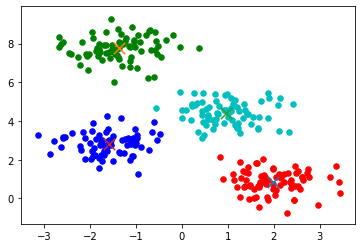

In [5]:
# Plotting the results
colors = 10*["r", "g", "c", "b", "k"]

color_count = 0
for key in kmeans.final_clusters:
  for points in kmeans.final_clusters[key]:
    plt.scatter(points[0], points[1], color = colors[color_count], s = 30)
  color_count += 1

for centroid in kmeans.final_centroids:
  plt.scatter(centroid[0], centroid[1], s = 130, marker = "x")

plt.show()

In [6]:
pred = [kmeans.predict(point) for point in X]
print(pred)

[0, 1, 2, 1, 0, 0, 3, 2, 1, 1, 3, 1, 2, 1, 0, 2, 2, 0, 3, 3, 0, 0, 2, 3, 3, 2, 0, 2, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 0, 2, 3, 2, 2, 3, 3, 1, 3, 1, 0, 3, 0, 1, 0, 0, 3, 1, 3, 1, 0, 1, 2, 1, 3, 3, 3, 1, 0, 1, 3, 2, 3, 1, 3, 3, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 3, 3, 2, 0, 0, 2, 3, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 3, 3, 0, 1, 0, 2, 1, 0, 0, 2, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 1, 3, 3, 0, 1, 3, 3, 1, 2, 1, 1, 3, 2, 3, 2, 3, 1, 2, 1, 1, 1, 2, 1, 2, 0, 3, 1, 3, 0, 2, 1, 2, 2, 0, 2, 3, 3, 2, 0, 2, 2, 1, 0, 2, 3, 1, 0, 0, 2, 3, 0, 2, 3, 3, 2, 2, 2, 2, 0, 1, 2, 3, 2, 2, 3, 3, 3, 2, 3, 1, 2, 3, 0, 3, 2, 1, 3, 1, 2, 1, 2, 3, 2, 2, 1, 3, 3, 0, 0, 2, 1, 0, 0, 3, 0, 3, 2, 1, 1, 2, 2, 1, 2, 0, 3, 2, 0, 3, 1, 3, 0, 2, 0, 1, 1, 1, 1, 3, 3, 1, 2, 3, 0, 2, 3, 3, 3, 0, 0, 1, 2, 2, 3, 0, 1, 3, 2, 1, 2, 0, 0, 3, 3, 2, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 3, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 3]


Text(0.5, 1.0, 'The True Clusters')

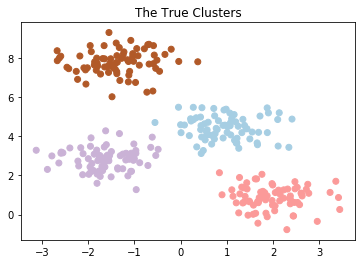

In [8]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')
plt.title("The True Clusters")

Text(0.5, 1.0, 'The Predicted Clusters')

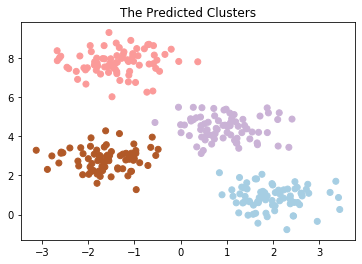

In [9]:
plt.scatter(X[:,0], X[:,1], c=pred, cmap='Paired')
plt.title("The Predicted Clusters")